# **Práctica 1 (Vacunación COVID)**




**A finales de 2020 empezó la vacunación del COVID-19 que ha producido la mayor pandemia mundial que se recuerda. Algunos países en vista de los problemas que puedan causar futuras pandemias quieren saber qué país está llevando el plan de vacunación más eficiente. Para ello vamos a obtener cual es la evolución del número de vacunados en el tiempo usando el set de datos vacunaciones.csv.**


---
**1.- Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para rellenar dicha celda, tendremos en cuenta el nombre del país para que no mezcle valores de distintos paises.
Tras observar la base de datos se aprecia que los valores están distribuidos por paises, y dentro de cada país, por fechas de menor a mayor, por tanto no tendremos que realizar ningun cambio al orden de los datos.**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Leer el archivo CSV
df = pd.read_csv('vacunaciones.csv')

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country', 'date'])

# Iterar sobre cada fila del DataFrame
for i, row in df.iterrows():
    if pd.isna(row['people_vaccinated']):
        # Obtener el país y la fecha de la fila actual
        country = row['country']
        date = row['date']

        # Obtener los datos de los días anteriores del mismo país
        previous_data = df[(df['country'] == country) & (df['date'] < date)].tail(3)

        # Filtrar los valores NaN de 'people_vaccinated' de los datos anteriores
        previous_data = previous_data.dropna(subset=['people_vaccinated'])

        # Calcular la media de los datos de 'people_vaccinated'
        if len(previous_data) > 0:
            mean_vaccinated = previous_data['people_vaccinated'].mean()
            # Rellenar el valor NaN con la media calculada
            df.at[i, 'people_vaccinated'] = mean_vaccinated
        else:
            # Si no hay datos anteriores no nulos, rellenar con cero
            df.at[i, 'people_vaccinated'] = 0

# Guardar el dataframe modificado en un nuevo archivo CSV
df.to_csv('vacunaciones_modificado.csv', index=False)

# Comprobar si se han rellenado todos los valores NaN
print("Cantidad de valores NaN después del llenado:", df['people_vaccinated'].isna().sum())


print(df['people_vaccinated'].iloc[12])


Cantidad de valores NaN después del llenado: 0
517.0


 La nueva base de datos, sin valores NaN, se denomina vacunaciones_modificado, compobamos que es correcto imprimiendo el valor de la posicion 12, Albania 22 enero, el cual era NaN, ahora es 517, que al hacer la media de los tres valores anteriores, 519, 549 y 483, confirmamos que es correcto. Además introducimos un print que nos confirme que ya no quedan valores NaN.

**2.- De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.**

Al representar los 5 países  que más días han vacunado en total, nos damos cuenta de que son Inglaterra, Irlanda del Norte, Escocia, Reino Unido y Gales, lo cual no tiene sentido pues Reino Unido es el conjunto del resto. Por ello, decidimos omitirlo y sacar el siguiente país con mayor número de días de vacunación, este es Israel con 5 puntos por debajo del resto.

In [4]:
# Agrupar por país y contar el número total de registros de vacunación para cada país
top_5_countries = df.groupby('country').size().nlargest(6)

# Mostrar los cinco países que más han vacunado
print(top_5_countries)

country
England             64
Northern Ireland    64
Scotland            64
United Kingdom      64
Wales               64
Israel              59
dtype: int64


Para representar nuestros datos, vamos a utilizar un gráfico de líneas, por dos razones:

Claridad temporal: Permite visualizar fácilmente cómo cambian los datos a lo largo del tiempo.

Comparación de series: Permite comparar múltiples series de datos de manera clara y concisa, utilizando diferentes colores para cada serie,  facilitando la identificación de tendencias.

**Para estudiar la evolución en el tiempo de estos países hemos optado por la categoría 'people_vaccinated', ya que sabemos que no hay valores NaN, y es una representación muy grafica de como se comporta cada país diariamente.**


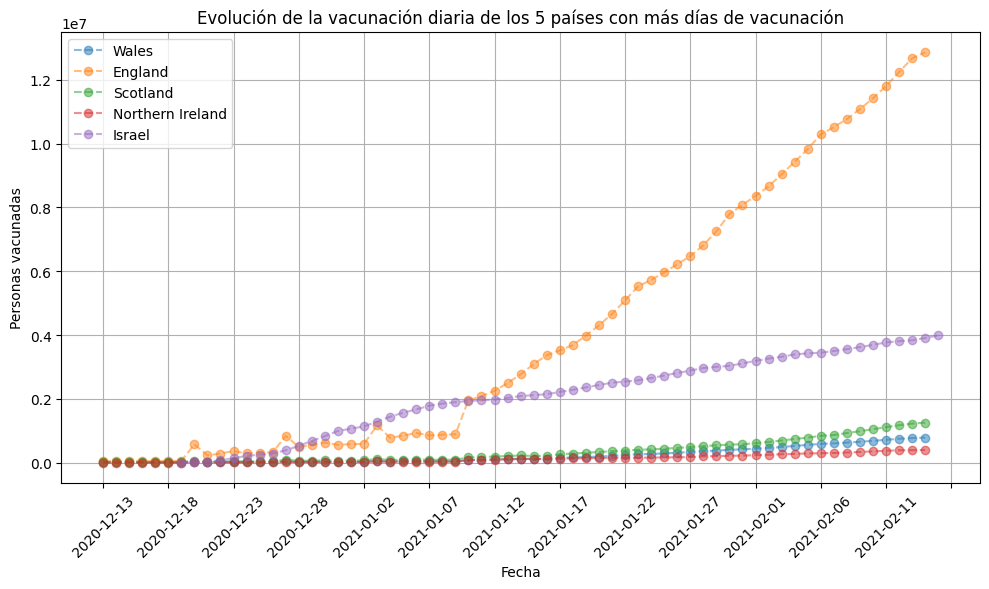

In [5]:
# Obtener los 5 países con más días de vacunación en total
top_5_countries = df['country'].value_counts().head(5).index
top_5_countries = top_5_countries.drop('United Kingdom')  # Excluir a United Kingdom

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))

# Mantener un registro de los países para los que ya se han trazado los datos rellenados
paises_trazados = set()

for country in top_5_countries:
    # Filtrar los datos del país
    datos_pais = df[df['country'] == country]

    # Verificar si hay valores NaN rellenados para el país actual
    nan_filled = datos_pais['people_vaccinated'].isna().any()

    # Si hay valores NaN rellenados, trazar solo una vez
    if nan_filled and country not in paises_trazados:
        datos_pais = datos_pais.dropna(subset=['people_vaccinated'])
        paises_trazados.add(country)

    # Trazar los datos del país, excepto para Israel
    if country != 'Israel':
        plt.plot(datos_pais['date'], datos_pais['people_vaccinated'], label=country, linestyle='--', marker='o', alpha=0.5)

# Filtrar los datos de Israel
datos_israel = df[df['country'] == 'Israel']
# Trazar los datos de Israel
plt.plot(datos_israel['date'], datos_israel['people_vaccinated'], label='Israel', linestyle='--', marker='o', alpha=0.5)

plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.title('Evolución de la vacunación diaria de los 5 países con más días de vacunación')
plt.xticks(range(0,70,5))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Al  incluir Israel, duplicaba los valores NaN, incluyendo los que habíamos rellenado al inicio,es decir todo ceros, por tanto representamos primero los otros 4 países y luego Israel.
Observando la gráfica se ve que el país con la vacunación más constante es prescisamente Israel, cuyo plan de vacunación podría ser el resultado de una combinación de factores que incluyen una infraestructura de salud sólida, una planificación anticipada, una comunicación efectiva y la capacidad de adaptación a medida que evoluciona la situación de la pandemia.